In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

In [2]:
#Read in CSV
stats_df = pd.read_csv('seasons_stats.csv')
stats_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [3]:
#Add MVP column
stats_df['MVP'] = "0"

#Drop player stats prior to 1980
stats_df=stats_df.drop(stats_df.index[0:5727])

#Drop unnnecessary columns
stats_df=stats_df.drop(columns=['Unnamed: 0', 'blanl', 'blank2'])

#Drop rows with Tm as TOT 
stats_df=stats_df[stats_df["Tm"]!="TOT"]

#Drop empty rows
stats_df=stats_df[stats_df["Year"]!= ""]               


In [4]:
stats_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0,0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0,0
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,0


In [5]:
#Add MVP winners

#1979-1980 Kareem Abdul-Jabbar
stats_df.at[5727, 'MVP']= 1
#1980-1981 Julius Erving
stats_df.at[6179, 'MVP']= 1
#1981-1982 Moses Malone
stats_df.at[6672, 'MVP']= 1
#1982-1983 Moses Malone
stats_df.at[7045, 'MVP']= 1
#1983-1984 Larry Bird
stats_df.at[7230, 'MVP']= 1
#1984-1985 Larry Bird
stats_df.at[7574, 'MVP']= 1
#1985-1986 Larry Bird
stats_df.at[7940, 'MVP']= 1
#1986-1987 Magic Johnson
stats_df.at[8459, 'MVP']= 1
#1987-1988 Michael Jordan
stats_df.at[8869, 'MVP']= 1
#1988-1989 Magic Johnson
stats_df.at[9283, 'MVP']= 1
#1989-1990 Magic Johnson
stats_df.at[9735, 'MVP']= 1
#1990-1991 Michael Jordan
stats_df.at[10212, 'MVP']= 1
#1991-1992 Michael Jordan
stats_df.at[10666, 'MVP']= 1
#1992-1993 Charles Barkley
stats_df.at[10937, 'MVP']= 1
#1993-1994 Hakeem Olajuwon
stats_df.at[11688, 'MVP']= 1
#1994-1995 David Robinson
stats_df.at[12182, 'MVP']= 1
#1995-1996 Michael Jordan
stats_df.at[12528, 'MVP']= 1
#1996-1997 Karl Malone
stats_df.at[13143, 'MVP']= 1
#1997-1998 Michael Jordan
stats_df.at[13654, 'MVP']= 1
#1998-1999 Karl Malone SHORTENED LOCKOUT SEASON
stats_df.at[14236, 'MVP']= 1
#1999-2000 Shaquille O'Neal
stats_df.at[14806, 'MVP']= 1
#2000-2001 Allen Iverson
stats_df.at[15186, 'MVP']= 1
#2001-2002 Tim Duncan
stats_df.at[15103, 'MVP']= 1
#2002-2003 Tim Duncan
stats_df.at[16129, 'MVP']= 1
#2003-2004 Kevin Garnett
stats_df.at[16674, 'MVP']= 1
#2004-2005 Steve Nash
stats_df.at[17452, 'MVP']= 1
#2005-2006 Steve Nash
stats_df.at[18020, 'MVP']= 1
#2006-2007 Dirk Nowitzki
stats_df.at[18569, 'MVP']= 1
#2007-2008 Kobe Bryant
stats_df.at[18825, 'MVP']= 1
#2008-2009 LeBron James
stats_df.at[19611, 'MVP']= 1
#2009-2010 LeBron James
stats_df.at[20207, 'MVP']= 1
#2010-11 Derrick Rose
stats_df.at[20991, 'MVP']= 1
#2011-2012 Lebron James
stats_df.at[21395, 'MVP']= 1
#2012-2013 LeBron James
stats_df.at[21933, 'MVP']= 1
#2013-2014 Kevin Durant
stats_df.at[22438, 'MVP']= 1
#2014-2015 Stephen Curry
stats_df.at[23000, 'MVP']= 1
#2015-2016 Stephen Curry
stats_df.at[23633, 'MVP']= 1
#2016-2017 Russell Westbrook
stats_df.at[24654, 'MVP']= 1

In [6]:
#Verify MVP Winners
print(stats_df.loc[stats_df['MVP'] == 1])

         Year                Player Pos   Age   Tm     G    GS      MP   PER  \
5727   1980.0  Kareem Abdul-Jabbar*   C  32.0  LAL  82.0   NaN  3143.0  25.3   
6179   1981.0        Julius Erving*  SF  30.0  PHI  82.0   NaN  2874.0  25.1   
6672   1982.0         Moses Malone*   C  26.0  HOU  81.0  81.0  3398.0  26.8   
7045   1983.0         Moses Malone*   C  27.0  PHI  78.0  78.0  2922.0  25.1   
7230   1984.0           Larry Bird*  PF  27.0  BOS  79.0  77.0  3028.0  24.2   
7574   1985.0           Larry Bird*  SF  28.0  BOS  80.0  77.0  3161.0  26.5   
7940   1986.0           Larry Bird*  SF  29.0  BOS  82.0  81.0  3113.0  25.6   
8459   1987.0        Magic Johnson*  PG  27.0  LAL  80.0  80.0  2904.0  27.0   
8869   1988.0       Michael Jordan*  SG  24.0  CHI  82.0  82.0  3311.0  31.7   
9283   1989.0        Magic Johnson*  PG  29.0  LAL  77.0  77.0  2886.0  26.9   
9735   1990.0        Magic Johnson*  PG  30.0  LAL  79.0  79.0  2937.0  26.6   
10212  1991.0       Michael Jordan*  SG 

In [7]:
stats_df["MVP"] = stats_df.MVP.astype(float)

In [8]:
stats_df = stats_df.fillna(0)

In [9]:
# Separate the y variable, the labels
target = stats_df["MVP"]

# Separate the X variable, the features
features = stats_df[["PTS", "TRB", "AST"]]

In [10]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
y = stats_df["MVP"]
X = stats_df[["PTS", "TRB", "AST"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train = X_scaler.fit_transform(X_train.astype(np.float))
X_test = X_scaler.transform(X_test.astype(np.float))

/Users/hieple/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/Users/hieple/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [12]:
stats_df.dtypes

Year      float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
MVP       float64
dtype: object

In [13]:
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [14]:
# Make a prediction using the testing data
testing_predictions = lr_model.predict(X_test)
testing_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, testing_predictions)

0.5

<AxesSubplot:>

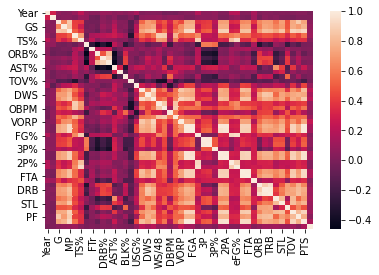

In [16]:
sns.heatmap(stats_df.corr())

In [17]:
stats_df=stats_df.drop(columns=['Year', '3PA', 'Pos', '3PAr', 'Tm', "eFG%", "FT%", "FTr", "Age", "Player", "GS"])

<AxesSubplot:>

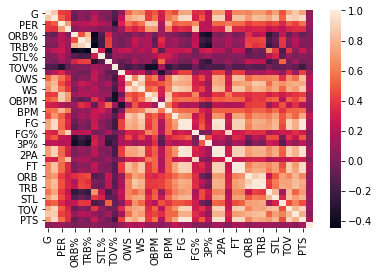

In [18]:
sns.heatmap(stats_df.corr())

In [19]:
stats_df.dtypes

G        float64
MP       float64
PER      float64
TS%      float64
ORB%     float64
DRB%     float64
TRB%     float64
AST%     float64
STL%     float64
BLK%     float64
TOV%     float64
USG%     float64
OWS      float64
DWS      float64
WS       float64
WS/48    float64
OBPM     float64
DBPM     float64
BPM      float64
VORP     float64
FG       float64
FGA      float64
FG%      float64
3P       float64
3P%      float64
2P       float64
2PA      float64
2P%      float64
FT       float64
FTA      float64
ORB      float64
DRB      float64
TRB      float64
AST      float64
STL      float64
BLK      float64
TOV      float64
PF       float64
PTS      float64
MVP      float64
dtype: object

In [20]:
y = stats_df["MVP"]
X = stats_df.drop(columns=["MVP"])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [22]:
stats_df["MVP"] = stats_df.MVP.astype(float)

In [23]:
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [24]:
testing_predictions = lr_model.predict(X_test)
testing_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, testing_predictions)

0.6248842592592593

In [26]:
X

,G,MP,PER,TS%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,82.0,3143.0,25.3,0.639,7.2,22.2,15.4,16.5,1.2,4.6,...,476.0,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,67.0,1222.0,11.0,0.511,5.4,12.0,8.6,9.3,1.4,0.6,...,82.0,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,75.0,2168.0,19.2,0.571,8.2,22.4,15.4,21.6,2.3,1.4,...,236.0,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,80.0,2864.0,15.3,0.574,2.3,5.3,3.8,30.2,1.7,0.2,...,435.0,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,26.0,560.0,7.4,0.524,6.0,16.9,11.5,9.0,1.0,1.5,...,50.0,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,62.0,1725.0,16.7,0.604,8.6,17.3,12.9,9.1,1.8,3.0,...,196.0,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,51.0,525.0,13.0,0.508,9.2,17.0,13.2,12.2,0.7,3.3,...,39.0,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,19.0,108.0,7.3,0.346,10.8,24.9,17.6,5.3,0.9,3.7,...,5.0,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,44.0,843.0,6.9,0.503,1.9,14.2,8.0,6.1,0.9,1.5,...,40.0,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [27]:
testing_report = classification_report(y_test,testing_predictions)

In [28]:
print(testing_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4320
         1.0       0.75      0.25      0.38        12

    accuracy                           1.00      4332
   macro avg       0.87      0.62      0.69      4332
weighted avg       1.00      1.00      1.00      4332

